In [2]:
import graph_tool as gt

from graph_tool.all import graph_draw

import inspect
import json
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path, PosixPath
import pandas as pd
import scip
#User
import pynetio as mio
from myitertools import exhaust, forp
import predicates as pred
from utils import doc, ls, psrc



home = Path.home()

if Path(".").absolute() == PosixPath('/home/aji/Projects/dev/pynet/pyext'):
    src = Path(".")
else:
    src = home / 'Projects/dev/pynet'
data = src / 'data'
lip = data / 'sars-cov-2-LiP'
multi = data / 'multi-proteomics'
apms_stuk = multi / '41586_2021_3493_MOESM6_ESM.xlsx'
apms_stuk_sheetname = 'A - Significant interactions'
apms_gordon = data / 'sars-cov-2-ppi/41586_2020_2286_MOESM5_ESM.xlsx'

#Variables for testing lip funcitons

xls_paths = list(mio.gen_excelpaths_from_dir(lip))
lip1 = xls_paths[1]

lipgen = mio.parse_lip_xls_file(lip1)

In [3]:
apms = pd.read_excel(apms_gordon)

In [4]:
def spec_counts_str_col_to_array(sc):
    def sc_row_to_list(scrow):
        mylist = []
        for i in scrow.split('|'):
            mylist.append(int(i))
        return mylist
    row_list = []
    for row in sc:
        row_list.append(sc_row_to_list(row))
    return np.array(row_list, dtype=np.uint8)
apms[['scr1', 'scr2', 'scr3']]=spec_counts_str_col_to_array(apms['Spec'])
    


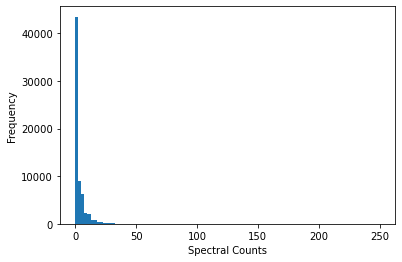

In [5]:
#The histogram of spectral counts
plt.hist(np.ravel(list(apms[i].values for i in ['scr1', 'scr2', 'scr3'])), bins=100)
plt.xlabel('Spectral Counts')
plt.ylabel("Frequency")
plt.show()

In [81]:
#Define the graph enumerator
def next_edge(e, vertex_n_max):
    if e[1] < vertex_n_max - 1: return (e[0], e[1]+1)
    else: return (e[0] + 1, e[0] + 2)
    
def next_graph_of_size_E(ordered_elist, vertex_n_max):
    change_index = -1
    proposed_e = next_edge(ordered_elist[change_index])
    

    
    
def generate_eseq(estart, vertex_n_max):
    yield estart
    while estart != (vertex_n_max - 2, vertex_n_max - 1):
        next_e = next_edge(estart, vertex_n_max)
        estart = next_e
        yield estart

def generate_pair_gen(estart, vmax):
    elist = list(generate_eseq(estart, vmax))
    while len(elist) > 0:
        e1 = elist.pop(0)
        for i in elist:
            yield [e1, i]

def generate_ordered_graphs(enum, estart, vmax):
    """
    Generate graphs in order with a given number of edges and vertices
    """
    combinations = scipy.special.comb((vmax-1)*(vmax -2) //2, enum, exact = True)
    i=0
    while i < combinations:
        
        
        i+=1
    
    
    possible_ordered_edges = list(generate_eseq((0, 1), vmax))
    estart_index = possible_ordered_edges.index(estart)
    g1 = possible_ordered_edges[estart_index:estart_index + enum]
    
    #Freeze the first two, enumerate the last



    
    print(g1)

    
def next_graph(current_elist, vmax):
    enum = len(elist)
    proposed_edge = next_edge(current_elist[-1])
    if proposed_edge[1] < vmax:
        
    
        
def enumerate_graphs(enum, vmax):
    """
    Enumerate graphs of enum edges have vmax vertices
    Defined for graphs with at least 3 vertices
    """
    e1 = (0, 1)
    
    

def undireceted_graph_enumerator(g):
    """
    For a graph of size n, enunmerate all graphs in order
    vertex identifiers [0, n)
    edge identifiers [0, 0.5n(n-1))
    """
    vertex_index_max = max(g.vertex_index)
    vertex_n_max = vertex_index_max + 1 #The number of vertices
    edge_n_max = vertex_n_max*(vertex_n_max - 1) // 2
    for edgenum in range(edge_n_max + 1): #Add 1 to make the range inclusive
        edgenum_combinations = scipy.special.comb(edge_n_max, edgenum, exact=True)
        print(edgenum_combinations)

g = gt.Graph()
for i in range(4):
    g.add_vertex()
#Define the graph prior


#Define the APMS likelihood


#Define the 


In [77]:
generate_graphs(3, (0, 1), 5)

[(0, 1), (0, 2), (0, 3)]


In [47]:
# (0, 1)
# (0, 2)
# (1, 2)

# (0, 1), (0, 2)
# (0, 1), (1, 2)
# (0, 2), (1, 2)

# (0, 1), (0, 2), (1, 2)


# (0, 1)
# (0, 2)
# (0, 3)
# (1, 2)
# (1, 3)
# (2, 3)

# (0, 1), (0, 2)
# (0, 1), (0, 3)
# (0, 1), (1, 2)
# (0, 1), (1, 3)
# (0, 1), (2, 3)

# (0, 2), (0, 3)
# (0, 2), (1, 2) ...


# (0, 1), (0, 2), (0, 3)
# (0, 1), (0, 2), (1, 2)
# (0, 1), (0, 2), (1, 3)
# (0, 1), (0, 2), (2, 3)

# (0, 1), (0, 3), (1, 2)
# (0, 1), (0, 3), (1, 3)
# (0, 1), (0, 3), (2, 3)

# (0, 1), (1, 2), (2, 3)

In [61]:
undireceted_graph_enumerator(g)

1
6
15
20
15
6
1


In [70]:
def pair_gen(estart, vmax):
    elist = list(generate_eseq(estart, vmax))
    while len(elist) > 0:
        e1 = elist.pop(0)
        for i in elist:
            yield [e1, i]

In [92]:
list(generate_eseq((0, 3), 4))

[(0, 3), (1, 2), (1, 3), (2, 3)]

In [93]:
list(next_edge((0, 3), 4))

[1, 2]